# Housing prediction


Overview

1) Understand the shape of the data (Histograms, box plots, etc.)

2) Data Cleaning

3) Data Exploration

4) Feature Engineering

5) Data Preprocessing for Model

6) Basic Model Building

7) Model Tuning

8) Ensemble Modle Building

9) Results

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/ML CW/housing.csv"
data = pd.read_csv(path)

## 1. Understanding data

In [ ]:
data.columns

for c in data.columns:
  print(c)

No.
longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


In [ ]:
data.shape

(1000, 11)

In [ ]:
data

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
995,996,-119.30,36.30,14,3023,469.0,1523,492,5.3602,118600,INLAND
996,997,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,INLAND
997,998,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,INLAND
998,999,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,INLAND


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 1000 non-null   int64  
 1   longitude           1000 non-null   float64
 2   latitude            1000 non-null   float64
 3   housing_median_age  1000 non-null   int64  
 4   total_rooms         1000 non-null   int64  
 5   total_bedrooms      991 non-null    float64
 6   population          1000 non-null   int64  
 7   households          1000 non-null   int64  
 8   median_income       1000 non-null   float64
 9   median_house_value  1000 non-null   int64  
 10  ocean_proximity     998 non-null    object 
dtypes: float64(4), int64(6), object(1)
memory usage: 86.1+ KB


In [ ]:
data.describe()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,991.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,-119.508740,35.604810,27.62500,2736.217000,557.273461,1471.59000,515.909000,3.955882,207767.443000
std,288.819436,1.960951,2.139722,12.27253,2179.854484,426.100791,1123.21073,384.781423,1.940355,113675.832278
min,1.000000,-124.190000,32.560000,2.00000,19.000000,11.000000,34.00000,9.000000,0.536000,14999.000000
25%,250.750000,-121.520000,33.910000,17.75000,1484.500000,301.500000,805.75000,287.750000,2.625000,119900.000000
50%,500.500000,-118.480000,34.255000,27.50000,2214.000000,449.000000,1199.50000,426.500000,3.692600,184350.000000
75%,750.250000,-118.030000,37.700000,36.00000,3260.000000,668.500000,1803.75000,626.000000,4.856800,261950.000000
max,1000.000000,-115.410000,41.780000,52.00000,27700.000000,4386.000000,15037.00000,4072.000000,15.000100,500001.000000


<Axes: xlabel='latitude', ylabel='longitude'>

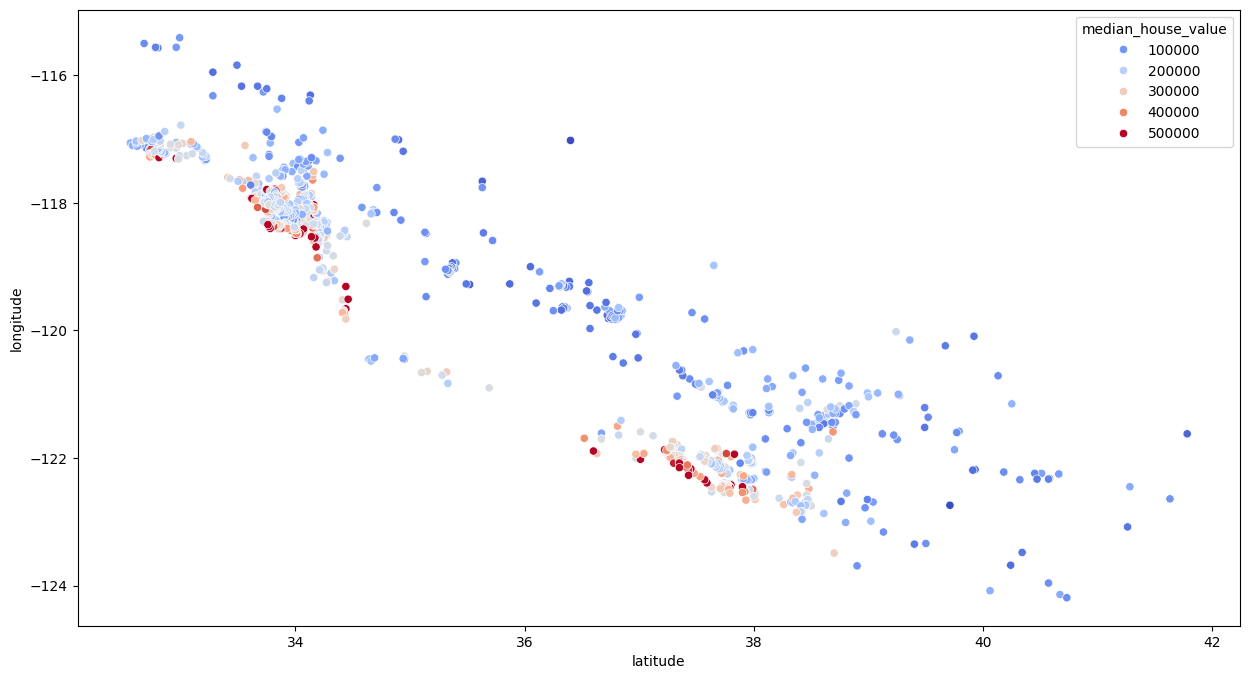

In [ ]:
# plot population with longitude and latitude
# data.plot(kind="scatter", x="longitude", y="latitude",
#              alpha=0.1, s=data["population"]/100, label="population",
#             c="median_house_value", cmap=plt.get_cmap("jet"))
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

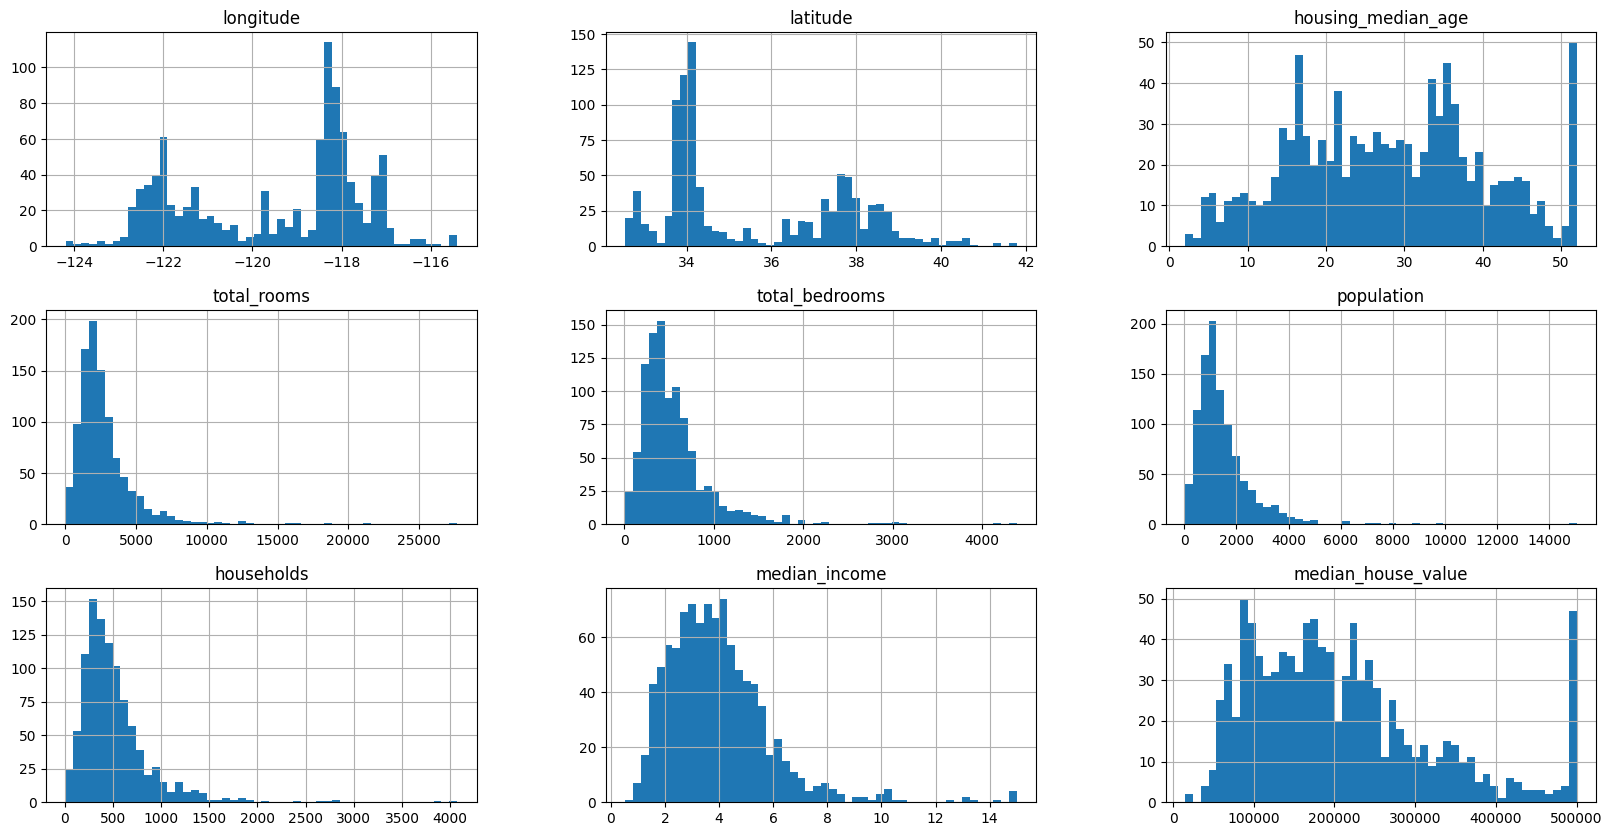

In [ ]:
# plot
# data.hist(bins=50, figsize=(20, 15))
data = data.drop(["No."], axis="columns")
data.hist(bins=50, figsize=(20, 10))

<ipython-input-20-8abda427c225>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

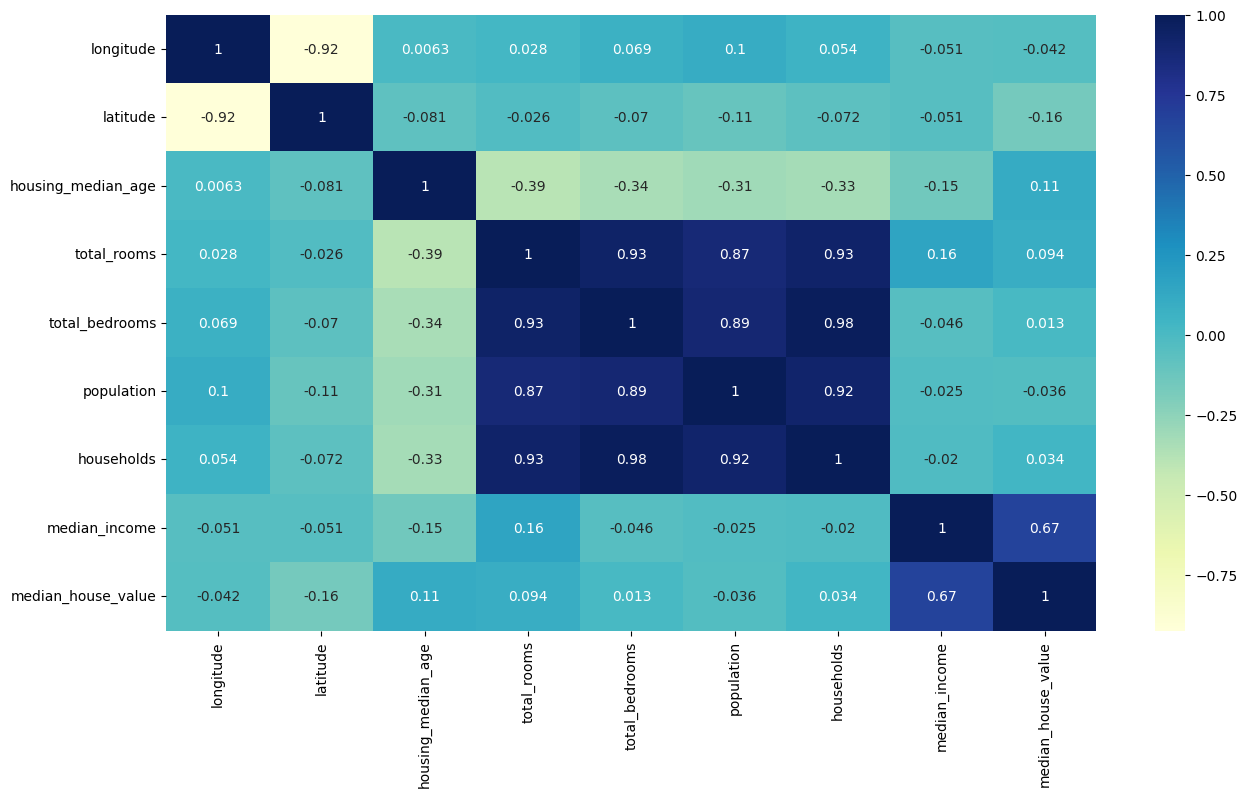

In [ ]:
# correlation
# plt.matshow(data.corr())
# plt.show()
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

# EXP - Feature Engineering


<ipython-input-22-2591b864637c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

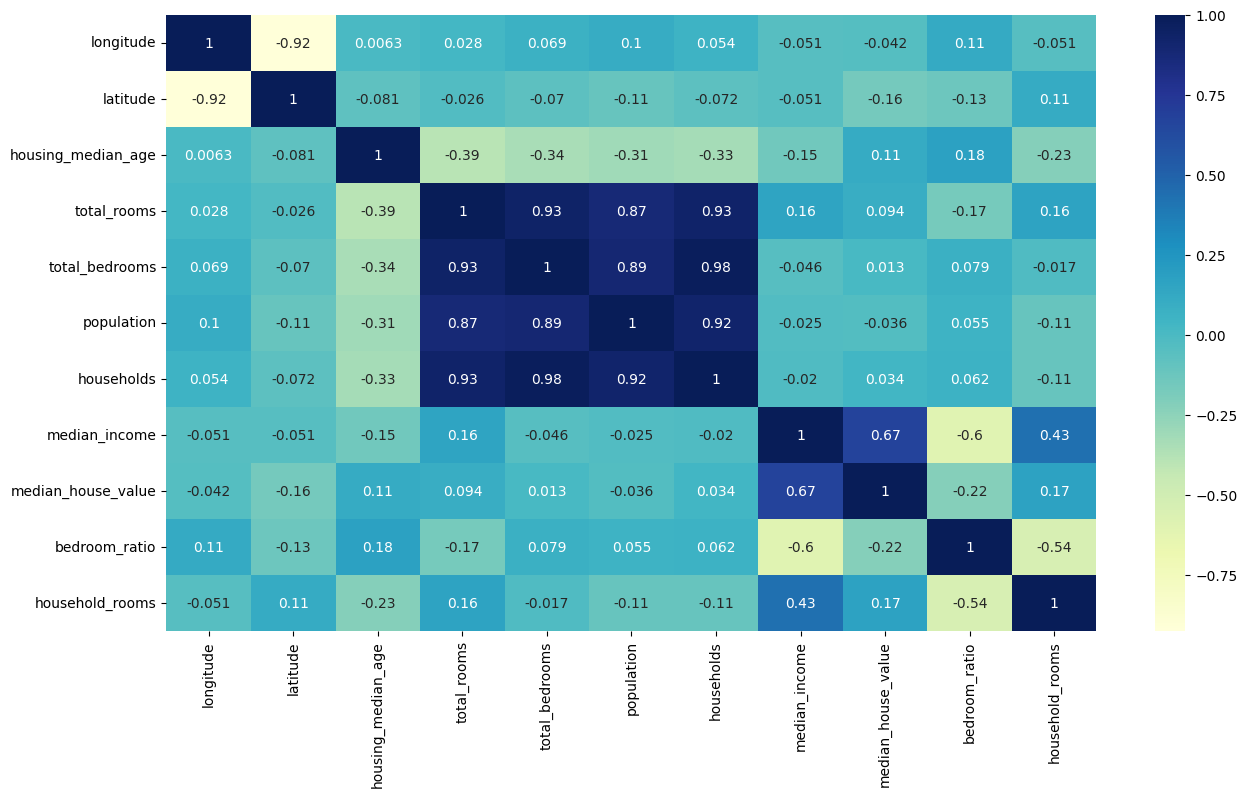

In [ ]:
# get bedroom ratio and household rooms. comapred to households, household-rooms is more corrolated
data['bedroom_ratio'] = data[ 'total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## EXP - FEATURE DROP FOR WEAK CORRELATION
respect to the median house value

In [ ]:
# data = data.drop(["total_rooms", "total_bedrooms", "population", "households"], axis="columns")
# data = data.drop(["No."], axis="columns")


## EXP - Normalize data (right skewed)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

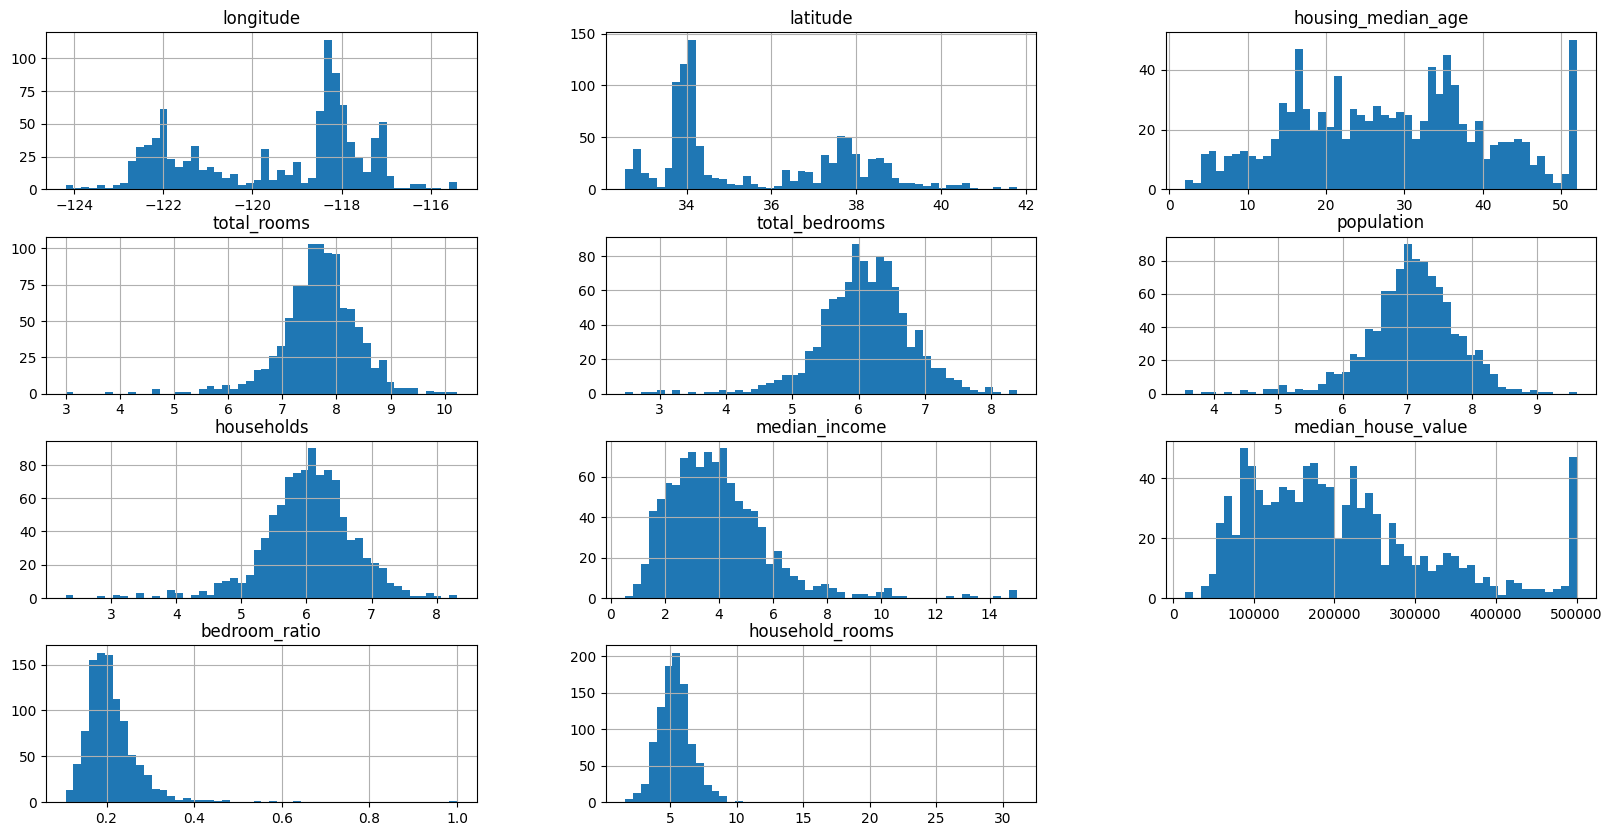

In [ ]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)
data.hist(bins=50, figsize=(20, 10))

# Data cleaning

## Fix categorical value

## drop na


In [ ]:
# data = data.dropna(subset=["total_bedrooms", "ocean_proximity"])
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           989 non-null    float64
 1   latitude            989 non-null    float64
 2   housing_median_age  989 non-null    int64  
 3   total_rooms         989 non-null    float64
 4   total_bedrooms      989 non-null    float64
 5   population          989 non-null    float64
 6   households          989 non-null    float64
 7   median_income       989 non-null    float64
 8   median_house_value  989 non-null    int64  
 9   ocean_proximity     989 non-null    object 
 10  bedroom_ratio       989 non-null    float64
 11  household_rooms     989 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 100.4+ KB


## drop cols: categorical val and indx
Drop another for multicollinearity, decrease the corrolation between them
drop near_bay since its the least amount of data

In [ ]:
data["ocean_proximity"].value_counts()

<1H OCEAN     453
INLAND        335
NEAR OCEAN    112
NEAR BAY       89
Name: ocean_proximity, dtype: int64

In [ ]:
# create binary values for each category
dummies = pd.get_dummies(data.ocean_proximity)
data = pd.concat([data, dummies], axis="columns")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_ratio,household_rooms,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.12,37.70,17,7.819636,6.426488,7.160846,6.289716,2.9922,179900,NEAR BAY,0.247990,4.624535,0,0,1,0
1,-122.21,38.10,36,8.012681,6.324359,7.276556,6.322565,3.8029,129900,NEAR BAY,0.184559,5.428058,0,0,1,0
2,-122.22,38.11,43,7.570443,5.869297,6.876265,5.973810,3.1848,112700,NEAR BAY,0.182053,4.946429,0,0,1,0
3,-122.20,37.78,52,7.741099,6.095825,7.111512,6.049733,3.5398,158400,NEAR BAY,0.192609,5.437352,0,0,1,0
4,-122.19,37.79,50,6.861711,5.384495,6.304449,5.308268,2.6667,172800,NEAR BAY,0.227463,4.746269,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-119.30,36.30,14,8.014336,6.152733,7.329094,6.200509,5.3602,118600,INLAND,0.155144,6.144309,0,1,0,0
996,-121.70,38.65,22,7.215975,5.645447,6.695799,5.438079,2.4167,225000,INLAND,0.207353,5.938865,0,1,0,0
997,-121.92,38.57,10,7.186144,5.509388,6.801283,5.433722,1.9327,193800,INLAND,0.186364,5.789474,0,1,0,0
998,-122.00,38.83,26,5.609472,3.912023,5.273000,3.970292,3.4187,98400,INLAND,0.180147,5.230769,0,1,0,0


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroom_ratio',
       'household_rooms', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [ ]:
data = data.drop(["ocean_proximity", "NEAR BAY"], axis="columns")
#' data.columns

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,<1H OCEAN,INLAND,NEAR OCEAN
0,-122.12,37.70,17,7.819636,6.426488,7.160846,6.289716,2.9922,179900,0.247990,4.624535,0,0,0
1,-122.21,38.10,36,8.012681,6.324359,7.276556,6.322565,3.8029,129900,0.184559,5.428058,0,0,0
2,-122.22,38.11,43,7.570443,5.869297,6.876265,5.973810,3.1848,112700,0.182053,4.946429,0,0,0
3,-122.20,37.78,52,7.741099,6.095825,7.111512,6.049733,3.5398,158400,0.192609,5.437352,0,0,0
4,-122.19,37.79,50,6.861711,5.384495,6.304449,5.308268,2.6667,172800,0.227463,4.746269,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-119.30,36.30,14,8.014336,6.152733,7.329094,6.200509,5.3602,118600,0.155144,6.144309,0,1,0
996,-121.70,38.65,22,7.215975,5.645447,6.695799,5.438079,2.4167,225000,0.207353,5.938865,0,1,0
997,-121.92,38.57,10,7.186144,5.509388,6.801283,5.433722,1.9327,193800,0.186364,5.789474,0,1,0
998,-122.00,38.83,26,5.609472,3.912023,5.273000,3.970292,3.4187,98400,0.180147,5.230769,0,1,0


<Axes: >

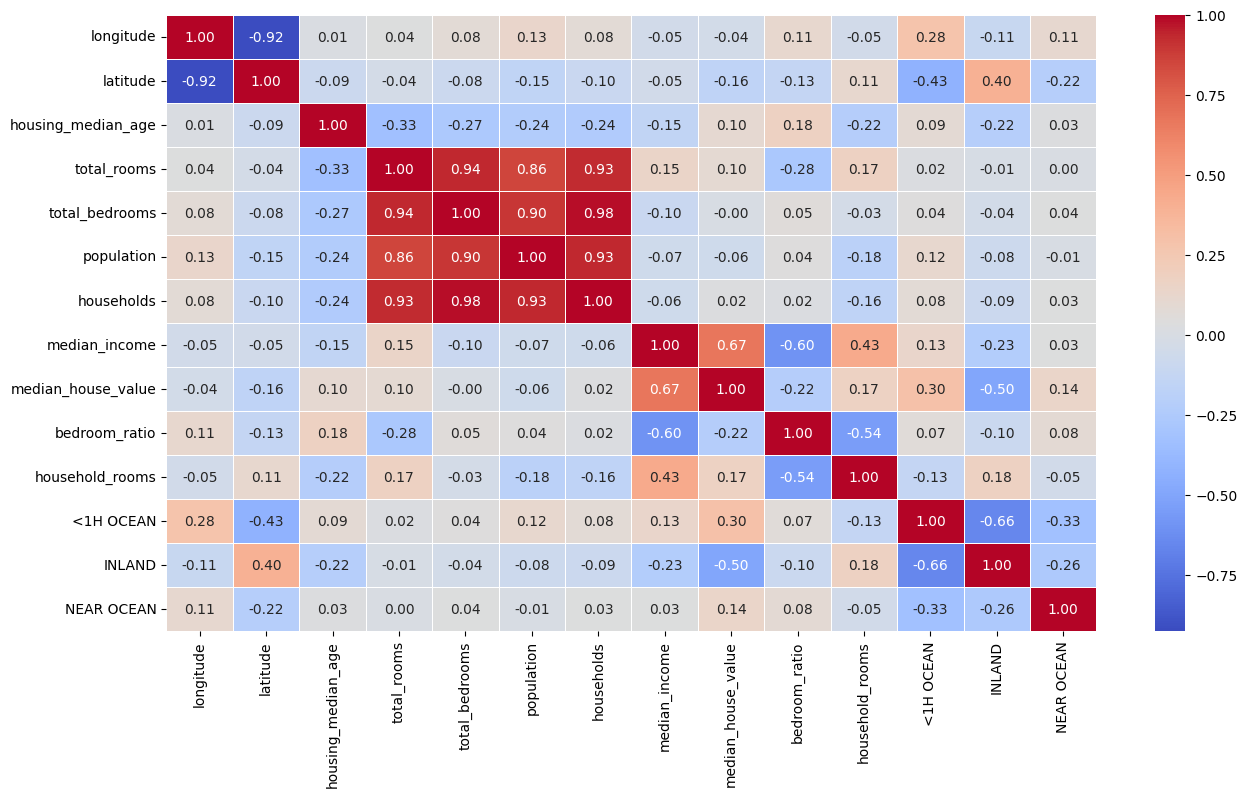

In [ ]:
# show how new features corrolate
plt.figure(figsize=(15, 8))
# sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


In [ ]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-21-545ce3a771a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.671420
housing_median_age    0.106038
total_rooms           0.093554
households            0.033697
total_bedrooms        0.013277
population           -0.035675
longitude            -0.042019
latitude             -0.160713
Name: median_house_value, dtype: float64

## EXPERIMENT DROPPING FEATURES

In [ ]:
# data = data.drop(['households', 'population', 'total_bedrooms', 'longitude', 'latitude'], axis=1)


# columns_to_keep = [
#     'longitude',
#     'latitude',
#     'housing_median_age',
#     'total_rooms',
#     'population',
#     'households',
#     'median_income',
#     'median_house_value',
#     'bedroom_ratio',
#     '<1H OCEAN'  # This looks like a category from one-hot encoding or similar
# ]
# # Create a new DataFrame 'data' with only the specified columns
# data = data[columns_to_keep]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           989 non-null    float64
 1   latitude            989 non-null    float64
 2   housing_median_age  989 non-null    int64  
 3   total_rooms         989 non-null    float64
 4   total_bedrooms      989 non-null    float64
 5   population          989 non-null    float64
 6   households          989 non-null    float64
 7   median_income       989 non-null    float64
 8   median_house_value  989 non-null    int64  
 9   bedroom_ratio       989 non-null    float64
 10  household_rooms     989 non-null    float64
 11  <1H OCEAN           989 non-null    uint8  
 12  INLAND              989 non-null    uint8  
 13  NEAR OCEAN          989 non-null    uint8  
dtypes: float64(9), int64(2), uint8(3)
memory usage: 95.6 KB


# Basic model selection

In [ ]:
x = data.drop(columns=["median_house_value"])
y = data["median_house_value"]
x.head()
y.head()

0    179900
1    129900
2    112700
3    158400
4    172800
Name: median_house_value, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, shuffle = True, random_state=42)
# Split the temporary set into validation and test sets (each 25% of the original dataset)
# x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


## Scale data

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## LInear regression


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model on the scaled test data
test_score = LR.score(x_test, y_test)
print("Test score: ", test_score)

y_test_pred = LR.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: ", test_mse)

test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2: ", test_r2)

Test score:  0.6043547655258688
Test MSE:  5187088701.331135
Test R^2:  0.6043547655258688


---------------------------------------------------------------------------


In [ ]:
# print("interception is: ", str(LR.intercept_))
# print("coefficients ", str(LR.coef_))
# print("R-squres value: ", str(LR.score(x_train, y_train)))

In [ ]:
# predict
# y_pred = LR.predict(x_test)
# performance = pd.DataFrame({ 'PREDICTIONS' :y_pred, 'ACTUAL VALUES':y_test})
# performance['error'] = performance ['ACTUAL VALUES' ]-performance [ 'PREDICTIONS']
# performance.head()

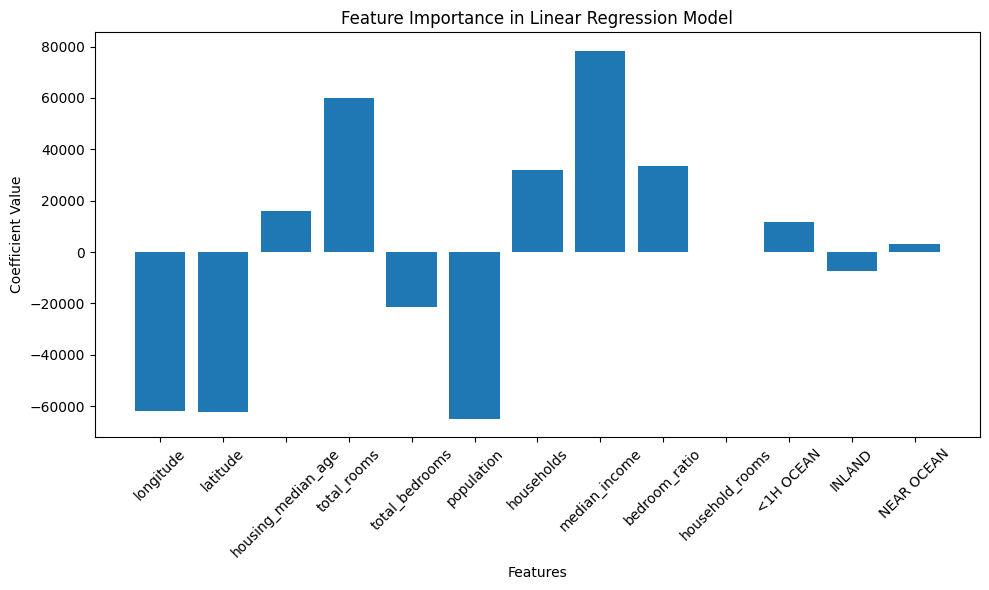

In [ ]:
# Assuming df is your original pandas DataFrame with the target variable included
features_df = data.drop('median_house_value', axis=1)  # Drop the target variable to isolate the features
feature_names = features_df.columns.tolist()  # Get the list of feature names
# Proceed with scaling and training as you have done in your script
# Get the coefficients from the trained model
coefficients = LR.coef_

# Create a bar plot for the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression Model')
plt.tight_layout()  # This will ensure that the feature names are not cut off in the plot
plt.show()

# print("Number of features:", len(feature_names))
# print("Number of coefficients:", len(LR.coef_))



## k nearest neigh


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming x_train, y_train for training; x_test, y_test for testing

# Define the parameter grid: test n_neighbors from 1 to 20
param_grid = {'n_neighbors': list(range(1, 21))}

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()

# Initialize GridSearchCV with the KNeighborsRegressor and the parameter grid
# Using negative MSE as the scoring metric for consistency
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best n_neighbors value and best cross-validated score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score_cv = grid_search.best_score_

# Retrieve the best estimator (model configured with the best n_neighbors)
best_knn = grid_search.best_estimator_

# Now, evaluate the best model on the testing data
test_predictions = best_knn.predict(x_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best cross-validated score (negative MSE): {best_score_cv}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R^2 score: {test_r2}")


Best n_neighbors: 4
Best cross-validated score (negative MSE): -5699321727.521968
Test RMSE: 85362.72390368981
Test R^2 score: 0.44419967792250314


## decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    # 'max_depth': [None, 5, 8, 10, 15, 20, 30, 40, 50],
    'max_depth': [None, 5, 8, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 6, 7, 8, 10],
    'min_samples_split': [2, 5, 10, 15, 18, 20, 23, 30]
    # 'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# Initialize a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best estimator (best decision tree model)
best_dt = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_dt.predict(x_test)

# Calculate MSE and R^2 for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Decision Tree Model's Parameters: ", grid_search.best_params_)
print("Test MSE: ", mse)
print("Test R^2: ", r2)

# Optionally, you can evaluate cross-validation performance directly from GridSearchCV results
best_score = np.sqrt(-grid_search.best_score_)  # Convert back from negative MSE to positive
print("Best Cross-Validation Root MSE: ", best_score)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Decision Tree Model's Parameters:  {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}
Test MSE:  7489311187.878566
Test R^2:  0.42875272593323055
Best Cross-Validation Root MSE:  71238.572991948


optimisation


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Optimal number of features: 9


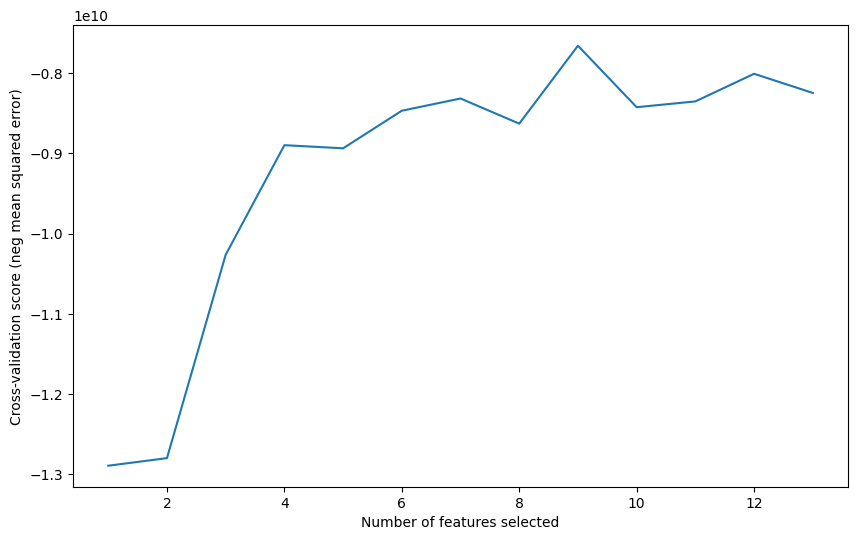

Optimal features selected by RFECV:
longitude
latitude
housing_median_age
population
households
median_income
median_house_value
bedroom_ratio
<1H OCEAN


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
# Choose a model for feature selection, here we use Decision Tree for demonstration
selector_model = DecisionTreeRegressor()

# Initialize RFECV
rfecv = RFECV(estimator=selector_model, step=1, cv=StratifiedKFold(5), scoring='neg_mean_squared_error')

# Fit RFECV
rfecv.fit(x_train, y_train)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)
# Accessing mean test scores from the cv_results_
mean_test_scores = rfecv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores (mean test score)
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg mean squared error)")
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores)
plt.show()

# Assuming 'feature_names' is a list of your original feature names corresponding to 'x_train'
feature_names = data.columns.tolist()  # Adjust this if 'data' doesn't represent your features directly

# Get a boolean mask of the selected features
selected_features_mask = rfecv.support_

# Use the mask to select the feature names
optimal_feature_names = [feature_name for feature_name, selected in zip(feature_names, selected_features_mask) if selected]

print("Optimal features selected by RFECV:")
for feature in optimal_feature_names:
    print(feature)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

# Load data and split into train and test sets
data = fetch_california_housing()
X, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],  # smaller grid for example's sake
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Best model
best_rf = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R^2: {r2}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 0.2540345930813259
Test R^2: 0.8061409855247303
